In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.express as px
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
#Importing CSV files
agroFood_df = pd.read_csv('Resources/Agrofood_co2_emission.csv')
data = pd.read_csv('Resources/world-data-2023.csv')


In [69]:
# Create an SQLite in-memory database (or use a file-based SQLite DB by specifying a filename instead of ':memory:')
#agroFood_df = pd.read_csv('Resources/Agrofood_co2_emission.csv')
engine = create_engine('sqlite:///my_database.db')

In [70]:

# Write the DataFrame to the SQLite database

agroFood_df.to_sql('emissions_data', con=engine, index=False, if_exists='replace')



6965

In [71]:
# Verify the data has been loaded by querying it
df_from_db = pd.read_sql('SELECT * FROM emissions_data', con=engine)
print (df_from_db)

             Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0               

In [72]:
# Display the first few rows of the queried data
df_from_db.head(10)


Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   
5  Afghanistan  1995        14.7237        0.0557       243.8152   
6  Afghanistan  1996        38.9302        0.2014       249.0364   
7  Afghanistan  1997        30.9378        0.1193       276.2940   
8  Afghanistan  1998        64.1411        0.3263       287.4346   
9  Afghanistan  1999        46.1683        0.0895       247.4980   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   
5            666.40                          0.0                 11.712073   
6            686.00                          0.0                 11.712073   
7            705.60                          0.0                 11.712073   
8            705.60                          0.0                 11.712073   
9            548.80                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   
5         54.6445   -2388.803  ...           397.5498                     0.0   
6         53.1637   -2388.803  ...           465.2050                     0.0   
7         52.0390   -2388.803  ...           511.5927                     0.0   
8         52.7050   -2388.803  ...           541.6598                     0.0   
9         35.7630   -2388.803  ...           611.0611                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   
5                              0.0                 NaN        13401971.0   
6                              0.0                 NaN        13952791.0   
7                              0.0                 NaN        14373573.0   
8                              0.0                 NaN        14733655.0   
9                              0.0                 NaN        15137497.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   
5         3697570.0                8219467.0                  8199445.0   
6         3870093.0                8569175.0                  8537421.0   
7         4008032.0                8916862.0                  8871958.0  

In [73]:
query = 'SELECT DISTINCT Area FROM emissions_data'

# Execute the query and load the results into a pandas DataFrame
countries_df = pd.read_sql(query, con=engine)

# Display the list of countries
print(countries_df)

               Area
0       Afghanistan
1           Albania
2           Algeria
3    American Samoa
4           Andorra
..              ...
231  Western Sahara
232           Yemen
233    Yugoslav SFR
234          Zambia
235        Zimbabwe

[236 rows x 1 columns]


In [74]:
# Query to count the number of distinct countries
query_count_countries = 'SELECT COUNT(DISTINCT Area) AS country_count FROM emissions_data'

# Execute the query and load the result into a pandas DataFrame
country_count_df = pd.read_sql(query_count_countries, con=engine)

# Display the count of distinct countries
print("Number of Distinct Countries in the Dataset:")
print(country_count_df)

Number of Distinct Countries in the Dataset:
   country_count
0            236


In [49]:
# Query to get all distinct years from the emissions_data table
query_years = 'SELECT DISTINCT Year FROM emissions_data ORDER BY Year'

# Execute the query and load the results into a pandas DataFrame
years_df = pd.read_sql(query_years, con=engine)

# Display the list of years
print("Distinct Years in the Dataset:")
print(years_df)

Distinct Years in the Dataset:
    Year
0   1990
1   1991
2   1992
3   1993
4   1994
5   1995
6   1996
7   1997
8   1998
9   1999
10  2000
11  2001
12  2002
13  2003
14  2004
15  2005
16  2006
17  2007
18  2008
19  2009
20  2010
21  2011
22  2012
23  2013
24  2014
25  2015
26  2016
27  2017
28  2018
29  2019
30  2020


In [50]:
# Query to count the number of distinct years
query_count_years = 'SELECT COUNT(DISTINCT Year) AS year_count FROM emissions_data'

# Execute the query and load the results into a pandas DataFrame
year_count_df = pd.read_sql(query_count_years, con=engine)

# Display the count of distinct years
print("Number of Distinct Years in the Dataset:")
print(year_count_df)

Number of Distinct Years in the Dataset:
   year_count
0          31


In [51]:
# Query specific data from the SQLite database using SQL
query = "SELECT area, year, total_emission FROM emissions_data WHERE year = 2020"
result = pd.read_sql(query, con=engine)

# Display the query result
result.head()


Area  Year  total_emission
0     Afghanistan  2020    14032.420621
1         Albania  2020     4411.888497
2         Algeria  2020    69603.093000
3  American Samoa  2020     5708.186226
4         Andorra  2020     5599.108259

In [52]:
#We query the SQLite database for CO2 emissions and urban population for a specific year (2020)
# 2. Query data for CO2 Emissions vs Population (scatter plot)
# Query total emissions and urban population for a specific year (e.g., 2020)
query = 'SELECT Area, total_emission, "Urban population" FROM emissions_data WHERE Year = 2020'
df_pop_emissions = pd.read_sql(query, con=engine)

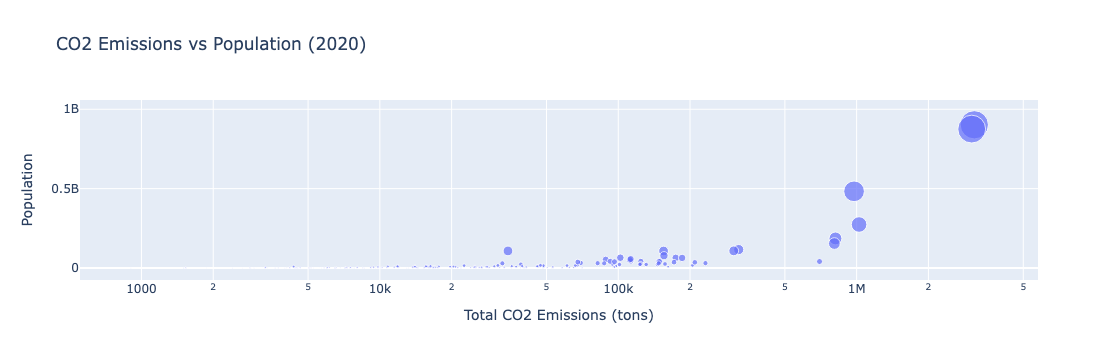

In [53]:
# Create a scatter plot using Plotly
fig_scatter = px.scatter(df_pop_emissions, x='total_emission', y='Urban population', hover_name='Area',
                         title='CO2 Emissions vs Population (2020)',
                         labels={'total_emission': 'Total CO2 Emissions (tons)', 'Urban population': ' Population'},
                         size='Urban population', log_x=True)

fig_scatter.show()

In [54]:
#We query the database for specific countries and emissions sources (savanna fires, forest fires, and crop residues) over time.
#Query data for CO2 Emissions by Agricultural Activity (line plot)
# Query for selected countries and emissions sources over time
selected_countries = ['Afghanistan', 'Brazil', 'India', 'United States']
query_agri_emissions = """
SELECT Year, Area, "Savanna fires", "Forest fires", "Crop Residues"
FROM emissions_data
WHERE Area IN ('Afghanistan', 'Brazil', 'India', 'United States')
ORDER BY Year;
"""
df_agri_emissions = pd.read_sql(query_agri_emissions, con=engine)

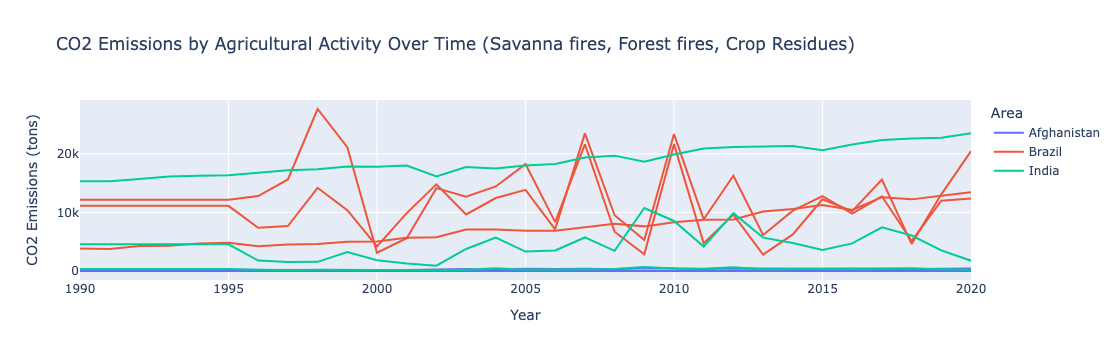

In [55]:
# Plot CO2 emissions by agricultural activity over time
fig_line = px.line(df_agri_emissions, x='Year', y=['Savanna fires', 'Forest fires', 'Crop Residues'], color='Area',
                   title='CO2 Emissions by Agricultural Activity Over Time (Savanna fires, Forest fires, Crop Residues)',
                   labels={'value': 'CO2 Emissions (tons)', 'variable': 'Emission Source'})

fig_line.show()

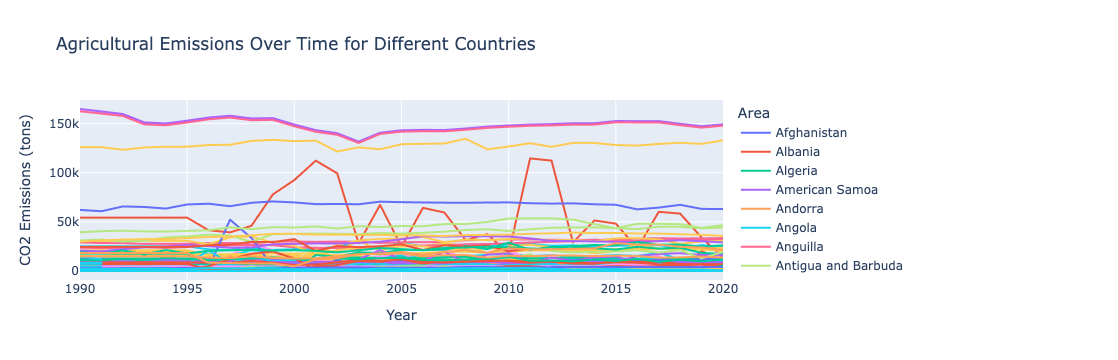

In [56]:
# Plot CO2 emissions by agricultural activity over time
fig = px.line(df_from_db, x='Year', y=['Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation'], 
              color='Area', title='Agricultural Emissions Over Time for Different Countries',
              labels={'value': 'CO2 Emissions (tons)', 'variable': 'Emission Source'})
fig.show()


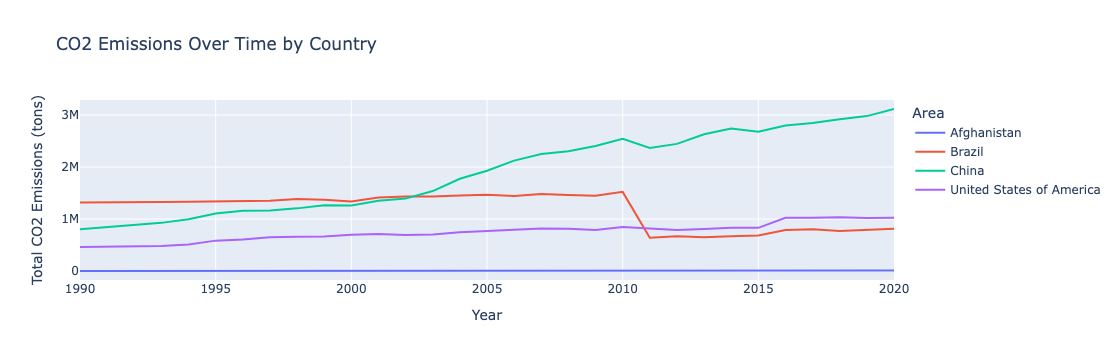

In [57]:
import plotly.express as px

# Filter dataset for a few selected countries (can modify based on your choice)
selected_countries = df_from_db[df_from_db['Area'].isin(['Afghanistan', 'Brazil', 'China', 'United States of America'])]

# Plot CO2 emissions over time
fig = px.line(selected_countries, x='Year', y='total_emission', color='Area', 
              title='CO2 Emissions Over Time by Country',
              labels={'total_emission': 'Total CO2 Emissions (tons)'})
fig.show()


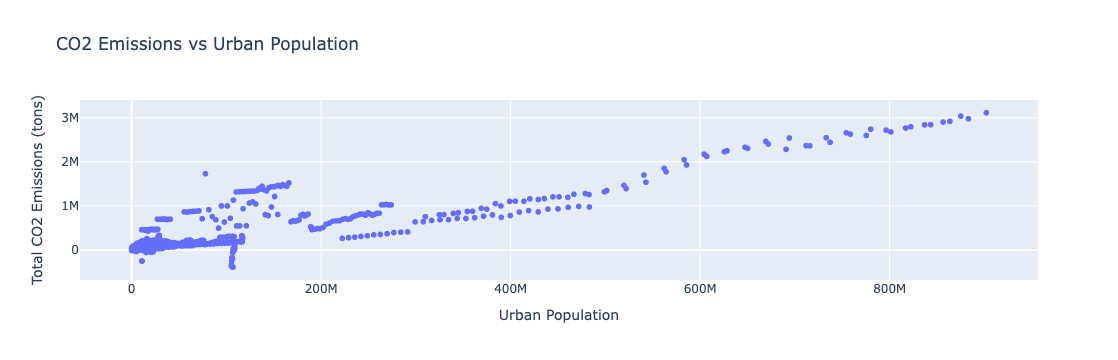

In [58]:
#Purpose: To explore the relationship between total CO2 emissions and the population size of each country
# Plot CO2 Emissions vs Urban Population
fig = px.scatter(df_from_db, x='Urban population', y='total_emission', hover_name='Area', 
                 title='CO2 Emissions vs Urban Population',
                 labels={'Urban population': 'Urban Population', 'total_emission': 'Total CO2 Emissions (tons)'})
fig.show()


In [59]:
#Purpose: To visualize the intensity of CO2 emissions across countries and years.
# Pivot table for heatmap
pivot_df = df_from_db.pivot(index='Area', columns='Year', values='total_emission')

# Display the pivot table
print(pivot_df.head())


Year                    1990          1991          1992          1993  \
Area                                                                     
Afghanistan      2198.963539   2323.876629   2356.304229   2368.470529   
Albania          3475.291240   5680.135772   5221.131572   5316.973272   
Algeria         22326.596965  25188.715007  25656.620883  26551.103455   
American Samoa   5299.122499   5296.268899   5304.147299   5298.828699   
Andorra          5576.553292   5579.774092   5554.404706   5586.025292   

Year                    1994          1995          1996          1997  \
Area                                                                     
Afghanistan      2500.768729   2624.612529   2838.921329   3204.180115   
Albania          5564.287672   5582.371349   3231.956747   3035.164016   
Algeria         25860.094379  26110.332301  26039.592029  27014.398496   
American Samoa   5288.813899   5279.510299   5278.027699   5282.133499   
Andorra          5589.867192   5597.5

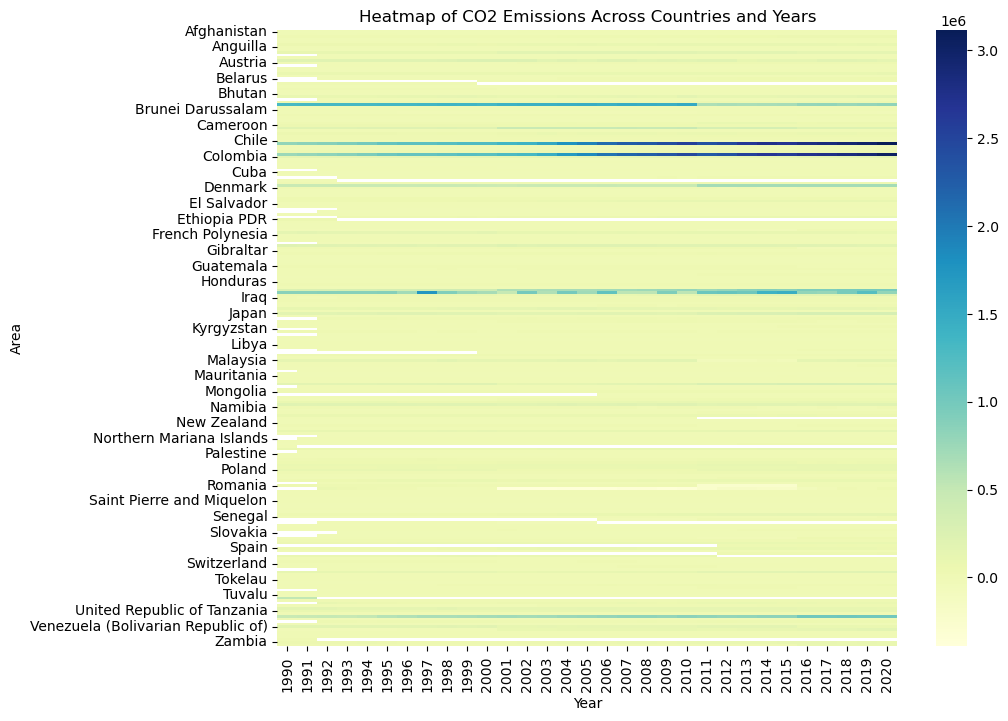

In [60]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=False)
plt.title('Heatmap of CO2 Emissions Across Countries and Years')
plt.show()


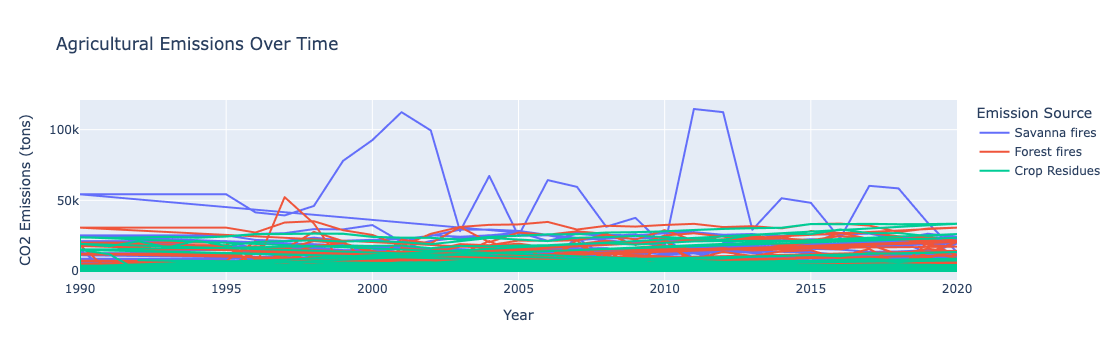

In [61]:
#Purpose: To visualize the total emissions from various agricultural activities (e.g., savanna fires, forest fires, etc.).
# Calculate total emissions from agricultural practices
# Drop rows with missing values in the columns you're plotting
df_clean = df_from_db[['Year', 'Savanna fires', 'Forest fires', 'Crop Residues']].dropna()

# Plot the cleaned data
fig = px.line(df_clean, x='Year', y=['Savanna fires', 'Forest fires', 'Crop Residues'], 
              title='Agricultural Emissions Over Time',
              labels={'value': 'CO2 Emissions (tons)', 'variable': 'Emission Source'})
fig.show()

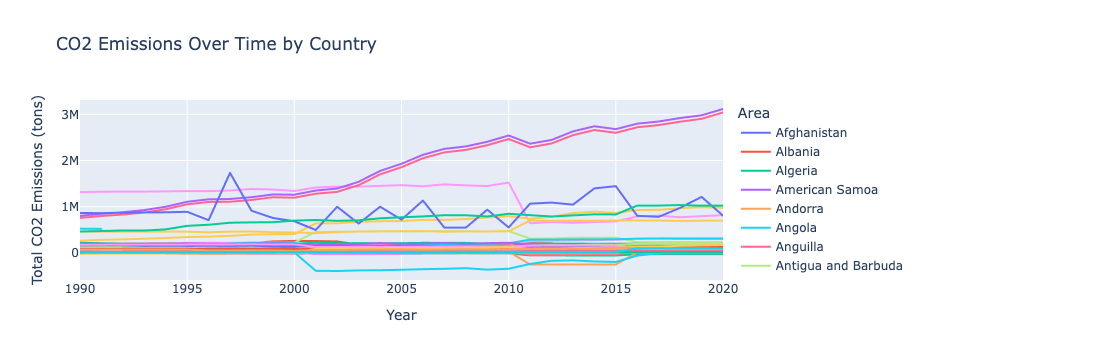

In [62]:
#Purpose: To see if agricultural emissions are increasing or decreasing compared to industrial emissions.
# Assuming you have a column for industrial emissions
# Plot CO2 emissions over time for a single country
fig = px.line(df_from_db, x='Year', y='total_emission', color='Area', 
              title='CO2 Emissions Over Time by Country',
              labels={'total_emission': 'Total CO2 Emissions (tons)'})
fig.show()


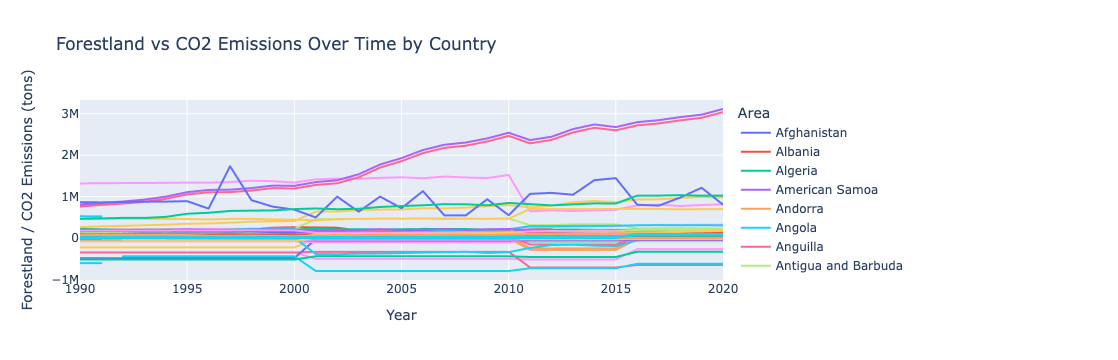

In [63]:
#Purpose: To see whether the size of forestland is decreasing and how that correlates with CO2 emissions over time.
# Plot forestland vs CO2 emissions over time
fig = px.line(df_from_db, x='Year', y=['Forestland', 'total_emission'], color='Area', 
              title='Forestland vs CO2 Emissions Over Time by Country',
              labels={'value': 'Forestland / CO2 Emissions (tons)', 'variable': 'Measurement'})
fig.show()


In [64]:
# Create an SQLite engine (this will create an SQLite file 'world_data.db')
engine = create_engine('sqlite:///world_data.db')

# Write the DataFrame to the SQLite database (in a table named 'world_data_2023')
data.to_sql('world_data_2023', con=engine, index=False, if_exists='replace')


195

In [65]:
#query to retrieve all data from the SQLite table
query = "SELECT * FROM world_data_2023"

# Use pd.read_sql() to execute the query and load the result into a DataFrame
world_data_from_db = pd.read_sql(query, con=engine)

# Display the first few rows of the queried DataFrame
print(world_data_from_db.head())


       Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468              None        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...   

In [66]:
query = "SELECT * FROM world_data_2023 WHERE Population > 10000000"
large_population_countries = pd.read_sql(query, con=engine)
print(large_population_countries.head())


       Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468              None        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...   